**ISE291 Project Term 231.**

    
1. **Team Members:**
 - **Ismael Arqsosi** ----> Data Preparation
 - **Moath Alasiri** -----> Communicate results & Operationalize
 - **Hassan Alsalam** ----> Data Discovery
 - **Suhaib Halawani** ---> Model Building
 - **Saleh Alzahrani** ---> Model Planning
        
        
        
2. **Team Number and Theme:**
    - Team number 2 and its theme is (Education)
    
3. **The Data:**
https://www.kaggle.com/datasets/kunal28chaturvedi/covid19-and-its-impact-on-students/code


# Data Discovery:

- In this study, a cross-sectional survey is conducted with a sample size of 1182 students of different age groups from different educational institutions in Delhi National Capital Region (NCR).

- In this paper, we  investigated and analyzed the potential consequences of  the COVID-19 pandemic on the life of students, The aim of this survey study is to investigate the impact of the COVID-19 pandemic on the education, health, and lifestyle of students from different age-groups

- **The article identified the following as the impact of COVID-19 on the students of different age groups:**

    ----------------------------------------------------------------------------
    - **ID:** for each row there is an id and we can consider it as an index.
    ----------------------------------------------------------------------------
    - **Region of residence:** Tell us about the country that a subject (Student) is living in.
    ----------------------------------------------------------------------------
    - **Age of Subject:** implise the age of a person who answered the survy.
    ----------------------------------------------------------------------------
    - **Time spent on Online Class:** number of hours spent on studying online.
    ----------------------------------------------------------------------------
    - **Rating of Online Class experience:** describe who much a student is satisfied with studying online.
    ----------------------------------------------------------------------------
    - **Medium for online class:** which device has been used by a student to study online during the pandemic.
    ----------------------------------------------------------------------------
    - **Time spent on self study:** show how many hour a subject spent on self study during the pandemic.
    ----------------------------------------------------------------------------
    - **Time spent on fitness:** time in hour for a subject spent on fitness during the pandemic.
    ----------------------------------------------------------------------------
    - **Time spent on sleep:** time in hour for a subject spent on sleep during the pandemic.
    ----------------------------------------------------------------------------
    - **Time spent on social media:** time in hour for a subject spent on social media during the pandemic.
    ----------------------------------------------------------------------------
    - **Prefered social media platform:** the prefered social media platform used by a subject.
    ----------------------------------------------------------------------------
    - **Time spent on TV:** time in hour for a subject spent on TV during the pandemic.
    ----------------------------------------------------------------------------
    - **Number of meals per day:** number of meals a subject used to eat during the pandemic.
    ----------------------------------------------------------------------------
    - **Change in your weight:** The change in the weight of a subject during the pandemic.
    ----------------------------------------------------------------------------
    - **Health issue during lockdown:** shows if the subject suffered from any health issue during the pandemic.
    ----------------------------------------------------------------------------
    - **Stress busters:** The activities that the subjects used to do to relieve his stress.
    ----------------------------------------------------------------------------
    - **Time utilized:** did the subject utilized his time efficiently to finish his tasks.
    ----------------------------------------------------------------------------
    - **Do you find yourself more connected with your family, close friends , relatives ?**
    ----------------------------------------------------------------------------
    - **What you miss the most:** What is the most activity that a subject missed during the pandemic.
    ----------------------------------------------------------------------------
    
- In this report our team is going to work on a model to predict the "Change in your weight" column based on other columns.

# Data Preparation:
a. Read the selected data, list the fields/variables, and identify their types.
b. List the inconsistencies, missing data, and outliers. Fix the inconsistencies, impute the
missing data, and remove the outliers.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#preparing pandas and np and some of the needed classes for later 

# Displaying the data
df = pd.read_csv('COVID-19 Survey Student Responses.csv')
display(df.iloc[:])

ID Region of residence  Age of Subject  Time spent on Online Class  \
0        R1           Delhi-NCR              21                         2.0   
1        R2           Delhi-NCR              21                         0.0   
2        R3           Delhi-NCR              20                         7.0   
3        R4           Delhi-NCR              20                         3.0   
4        R5           Delhi-NCR              21                         3.0   
...     ...                 ...             ...                         ...   
1177  R1191           Delhi-NCR              12                         3.0   
1178  R1192           Delhi-NCR              14                         6.0   
1179  R1193           Delhi-NCR              13                         4.0   
1180  R1194           Delhi-NCR              14                         5.0   
1181  R1195           Delhi-NCR              13                         5.0   

     Rating of Online Class experience Medium for online class  \
0                                 Good          Laptop/Desktop   
1                            Excellent              Smartphone   
2                            Very poor          Laptop/Desktop   
3                            Very poor              Smartphone   
4                                 Good          Laptop/Desktop   
...                                ...                     ...   
1177                              Good              Smartphone   
1178                           Average              Smartphone   
1179                           Average              Smartphone   
1180                         Excellent          Laptop/Desktop   
1181                              Good                  Tablet   

      Time spent on self study  Time spent on fitness  Time spent on sleep  \
0                          4.0                    0.0                  7.0   
1                          0.0                    2.0                 10.0   
2                          3.0                    0.0                  6.0   
3                          2.0                    1.0                  6.0   
4                          3.0                    1.0                  8.0   
...                        ...                    ...                  ...   
1177                       4.0                    1.0                  8.0   
1178                       4.0                    1.0                  9.0   
1179                       0.0                    0.5                  8.0   
1180                       3.5                    1.0                  8.0   
1181                       2.0                    0.5                  7.0   

      Time spent on social media Prefered social media platform  \
0                            3.0                       Linkedin   
1                            3.0                        Youtube   
2                            2.0                       Linkedin   
3                            5.0                      Instagram   
4                            3.0                      Instagram   
...                          ...                            ...   
1177                         1.0                      Instagram   
1178                         1.0                       Whatsapp   
1179                         3.0                        Youtube   
1180                         0.5                        Youtube   
1181                         1.0                       Whatsapp   

     Time spent on TV  Number of meals per day Change in your weight  \
0                   1                        4             Increased   
1                   0                        3             Decreased   
2                   0                        3       Remain Constant   
3                   0                        3             Decreased   
4                   1                        4       Remain Constant   
...               ...                      ...                   ...   
1177                2

In [2]:
# Remove ID column because it is just fo indexing

column_to_delete = 'ID'

# The first column is not important and dose not affect the analysis so we will delete it:
df.drop(columns=[column_to_delete], inplace=True)

In [3]:
display(df.info()) # Display information about data to see if there is inconsistancy

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 18 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Region of residence                                                                 1182 non-null   object 
 1   Age of Subject                                                                      1182 non-null   int64  
 2   Time spent on Online Class                                                          1182 non-null   float64
 3   Rating of Online Class experience                                                   1158 non-null   object 
 4   Medium for online class                                                             1131 non-null   object 
 5   Time spent on self study                                                            1182 non-null

None

In [4]:
Objects = df.select_dtypes("object")
Objects.describe()

Region of residence Rating of Online Class experience  \
count                 1182                              1158   
unique                   2                                 5   
top              Delhi-NCR                         Very poor   
freq                   721                               413   

       Medium for online class Prefered social media platform  \
count                     1131                           1165   
unique                       5                             15   
top             Laptop/Desktop                      Instagram   
freq                       545                            352   

       Time spent on TV Change in your weight Health issue during lockdown  \
count              1182                  1182                         1182   
unique               25                     3                            2   
top                   0       Remain Constant                           NO   
freq                441                   535                         1021   

            Stress busters Time utilized  \
count                 1182          1182   
unique                  86             2   
top     Listening to music            NO   
freq                   276           608   

       Do you find yourself more connected with your family, close friends , relatives  ?  \
count                                                1182                                   
unique                                                  2                                   
top                                                   YES                                   
freq                                                  831                                   

       What you miss the most  
count                    1182  
unique                     51  
top            School/college  
freq                      379

In [5]:
df.describe()

Age of Subject  Time spent on Online Class  Time spent on self study  \
count     1182.000000                 1182.000000               1182.000000   
mean        20.165821                    3.208841                  2.911591   
std          5.516467                    2.101756                  2.140590   
min          7.000000                    0.000000                  0.000000   
25%         17.000000                    2.000000                  2.000000   
50%         20.000000                    3.000000                  2.000000   
75%         21.000000                    5.000000                  4.000000   
max         59.000000                   10.000000                 18.000000   

       Time spent on fitness  Time spent on sleep  Time spent on social media  \
count            1182.000000          1182.000000                 1182.000000   
mean                0.765821             7.871235                    2.365694   
std                 0.724451             1.615762                    1.767336   
min                 0.000000             4.000000                    0.000000   
25%                 0.000000             7.000000                    1.000000   
50%                 1.000000             8.000000                    2.000000   
75%                 1.000000             9.000000                    3.000000   
max                 5.000000            15.000000                   10.000000   

       Number of meals per day  
count              1182.000000  
mean                  2.917936  
std                   0.828698  
min                   1.000000  
25%                   2.000000  
50%                   3.000000  
75%                   3.000000  
max                   8.000000

In [6]:
df.isna().any()

Region of residence                                                                   False
Age of Subject                                                                        False
Time spent on Online Class                                                            False
Rating of Online Class experience                                                      True
Medium for online class                                                                True
Time spent on self study                                                              False
Time spent on fitness                                                                 False
Time spent on sleep                                                                   False
Time spent on social media                                                            False
Prefered social media platform                                                         True
Time spent on TV                                                                

In [7]:
# remove all nan values 

null_columns = df.columns[df.isna().any()]
print('Columns with NaN values are:\n')
for i in null_columns:
    print(i)
    
print("=" * 70)

for c in null_columns:
    if df[c].dtype!='object':
        value = df[c].mean()
    else:
        value = df[c].mode()
        value = value[0]
    df[c].fillna(value,inplace=True)

display(df)

Columns with NaN values are:

Rating of Online Class experience
Medium for online class
Prefered social media platform


Region of residence  Age of Subject  Time spent on Online Class  \
0              Delhi-NCR              21                         2.0   
1              Delhi-NCR              21                         0.0   
2              Delhi-NCR              20                         7.0   
3              Delhi-NCR              20                         3.0   
4              Delhi-NCR              21                         3.0   
...                  ...             ...                         ...   
1177           Delhi-NCR              12                         3.0   
1178           Delhi-NCR              14                         6.0   
1179           Delhi-NCR              13                         4.0   
1180           Delhi-NCR              14                         5.0   
1181           Delhi-NCR              13                         5.0   

     Rating of Online Class experience Medium for online class  \
0                                 Good          Laptop/Desktop   
1                            Excellent              Smartphone   
2                            Very poor          Laptop/Desktop   
3                            Very poor              Smartphone   
4                                 Good          Laptop/Desktop   
...                                ...                     ...   
1177                              Good              Smartphone   
1178                           Average              Smartphone   
1179                           Average              Smartphone   
1180                         Excellent          Laptop/Desktop   
1181                              Good                  Tablet   

      Time spent on self study  Time spent on fitness  Time spent on sleep  \
0                          4.0                    0.0                  7.0   
1                          0.0                    2.0                 10.0   
2                          3.0                    0.0                  6.0   
3                          2.0                    1.0                  6.0   
4                          3.0                    1.0                  8.0   
...                        ...                    ...                  ...   
1177                       4.0                    1.0                  8.0   
1178                       4.0                    1.0                  9.0   
1179                       0.0                    0.5                  8.0   
1180                       3.5                    1.0                  8.0   
1181                       2.0                    0.5                  7.0   

      Time spent on social media Prefered social media platform  \
0                            3.0                       Linkedin   
1                            3.0                        Youtube   
2                            2.0                       Linkedin   
3                            5.0                      Instagram   
4                            3.0                      Instagram   
...                          ...                            ...   
1177                         1.0                      Instagram   
1178                         1.0                       Whatsapp   
1179                         3.0                        Youtube   
1180                         0.5                        Youtube   
1181                         1.0                       Whatsapp   

     Time spent on TV  Number of meals per day Change in your weight  \
0                   1                        4             Increased   
1                   0                        3             Decreased   
2                   0                        3       Remain Constant   
3                   0                        3             Decreased   
4                   1                        4       Remain Constant   
...               ...                      ...                   ...   
1177                2                        3             Decreased   
1178                1        

In [8]:
for column in df.columns:
    unique_count = df[column].nunique()
    unique_values = df[column].unique()
    
    print(f"Column: '{column}'")
    print(f"Number of unique values: {unique_count}")
    print("Unique values:")
    print(unique_values)
    print()

Column: 'Region of residence'
Number of unique values: 2
Unique values:
['Delhi-NCR' 'Outside Delhi-NCR']

Column: 'Age of Subject'
Number of unique values: 42
Unique values:
[21 20 19 22 31 23 17 24 18 25 16 10 14 15 34 26 59 32 30 13 29 12 43 11
 40 42 28 27  9 36  8 50 35 45  7 44 46 52 38 37 33 39]

Column: 'Time spent on Online Class'
Number of unique values: 21
Unique values:
[ 2.    0.    7.    3.    1.    5.    4.    8.    6.    1.5   2.5   0.1
  0.5   9.    5.5   0.75  0.7   3.5   0.8  10.    7.5 ]

Column: 'Rating of Online Class experience'
Number of unique values: 5
Unique values:
['Good' 'Excellent' 'Very poor' 'Average' 'Poor']

Column: 'Medium for online class'
Number of unique values: 5
Unique values:
['Laptop/Desktop' 'Smartphone' 'Tablet' 'Any Gadget'
 'Smartphone or Laptop/Desktop']

Column: 'Time spent on self study'
Number of unique values: 23
Unique values:
[ 4.   0.   3.   2.   6.   1.   5.  18.   8.  17.   0.5  7.   1.5  2.5
 10.  12.   9.   2.3  1.2  3.5  6.5 1

In [9]:
# resolve inconsistancy in Time spent on TV column

column_to_resolve = 'Time spent on TV'

# Convert valid numeric values to numbers
df[column_to_resolve] = pd.to_numeric(df[column_to_resolve], errors = 'coerce')


# Optionally, fill or impute missing or NaN values with zero
#becaues the answres gotten were 'no tv' and 'N' which means 0 houres.
df[column_to_resolve].fillna(0, inplace=True)

# Display the DataFrame
display(df[column_to_resolve].unique())

array([ 1.  ,  0.  ,  3.  ,  0.5 ,  2.  ,  4.5 ,  1.5 ,  4.  ,  0.3 ,
        5.  ,  0.1 ,  0.25,  6.  ,  0.6 ,  7.  ,  8.  , 15.  ,  0.75,
        2.5 ,  3.5 ,  0.4 ])

In [10]:
for column in df.columns:
    unique_count = df[column].nunique()
    unique_values = df[column].unique()
    
    print(f"Column: '{column}'")
    print(f"Number of unique values: {unique_count}")
    print("Unique values:")
    print(unique_values)
    print()
    

Column: 'Region of residence'
Number of unique values: 2
Unique values:
['Delhi-NCR' 'Outside Delhi-NCR']

Column: 'Age of Subject'
Number of unique values: 42
Unique values:
[21 20 19 22 31 23 17 24 18 25 16 10 14 15 34 26 59 32 30 13 29 12 43 11
 40 42 28 27  9 36  8 50 35 45  7 44 46 52 38 37 33 39]

Column: 'Time spent on Online Class'
Number of unique values: 21
Unique values:
[ 2.    0.    7.    3.    1.    5.    4.    8.    6.    1.5   2.5   0.1
  0.5   9.    5.5   0.75  0.7   3.5   0.8  10.    7.5 ]

Column: 'Rating of Online Class experience'
Number of unique values: 5
Unique values:
['Good' 'Excellent' 'Very poor' 'Average' 'Poor']

Column: 'Medium for online class'
Number of unique values: 5
Unique values:
['Laptop/Desktop' 'Smartphone' 'Tablet' 'Any Gadget'
 'Smartphone or Laptop/Desktop']

Column: 'Time spent on self study'
Number of unique values: 23
Unique values:
[ 4.   0.   3.   2.   6.   1.   5.  18.   8.  17.   0.5  7.   1.5  2.5
 10.  12.   9.   2.3  1.2  3.5  6.5 1

In [11]:
# removing outliers among the numerical data

column_to_replace_outliers = ['Time spent on Online Class', 'Time spent on self study', 'Time spent on fitness','Time spent on sleep','Time spent on social media','Time spent on TV']  # Replace with actual column names

# Using IQR Method on the columns that contains time
for column in column_to_replace_outliers:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_threshold = 1.5
    outliers_mask = (df[column] < Q1 - outlier_threshold * IQR) | (df[column] > Q3 + outlier_threshold * IQR)
    df.drop(df.loc[outliers_mask,:].index, inplace = True)
    
#========================================================================
# Using Z-Score on 'Age of Subject' because when using IQR on this column resulted with removing extra data.
column_to_replace = 'Age of Subject'

# Calculate the Z-score for the specified column
z_scores = zscore(df[column_to_replace])

# Set a threshold for considering a value as an outlier (e.g., Z-score greater than 3 or less than -3)
outlier_threshold = 3

# Create a boolean mask for outliers
outliers_mask = (z_scores > outlier_threshold) | (z_scores < -outlier_threshold)

# Replace outliers with the mean of the column
df.drop(df.loc[outliers_mask,:].index, inplace = True)
    
#===================================================================
column_to_replace_outliers = ['Age of Subject','Time spent on Online Class', 'Time spent on self study', 'Time spent on fitness','Time spent on sleep','Time spent on social media','Time spent on TV']  # Replace with actual column names

    
# Printing the Unique value again
for column in column_to_replace_outliers:
    unique_count = df[column].nunique()
    unique_values = df[column].unique()
    
    print(f"Column: '{column}'")
    print(f"Number of unique values: {unique_count}")
    print("Unique values:")
    print(unique_values)
    print()

Column: 'Age of Subject'
Number of unique values: 31
Unique values:
[21 20 19 22 31 17 24 18 23 25 16 10 14 15 34 32 30 29 26 12 11 13 28 27
  9 36  8 35  7 37 33]

Column: 'Time spent on Online Class'
Number of unique values: 19
Unique values:
[2.   0.   7.   3.   1.   5.   4.   8.   6.   1.5  2.5  0.1  0.5  9.
 5.5  0.75 0.7  0.8  7.5 ]

Column: 'Time spent on self study'
Number of unique values: 16
Unique values:
[4.  0.  3.  2.  6.  1.  5.  0.5 7.  1.5 2.5 2.3 1.2 3.5 6.5 4.5]

Column: 'Time spent on fitness'
Number of unique values: 8
Unique values:
[0.   2.   1.   0.5  2.5  0.3  0.25 0.6 ]

Column: 'Time spent on sleep'
Number of unique values: 14
Unique values:
[ 7.  10.   6.   8.   5.   9.   4.  12.  11.   6.5  7.5  7.8  8.5  8.3]

Column: 'Time spent on social media'
Number of unique values: 18
Unique values:
[3.   2.   5.   1.   4.   0.   6.   1.5  0.5  0.3  0.15 0.1  3.5  0.6
 0.75 1.3  0.4  0.25]

Column: 'Time spent on TV'
Number of unique values: 17
Unique values:
[1.   0

## Data Transformation:


- In this part we will conduct **Data Transformation** on our data to make sure that the data is ready for visualization.

In [12]:
columns_to_drop = ['Stress busters', 'What you miss the most']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)
display(df)

#saving a clean version of the untransformed data for Data Visualization.
vdf=df.copy()

Region of residence  Age of Subject  Time spent on Online Class  \
0              Delhi-NCR              21                         2.0   
1              Delhi-NCR              21                         0.0   
2              Delhi-NCR              20                         7.0   
3              Delhi-NCR              20                         3.0   
4              Delhi-NCR              21                         3.0   
...                  ...             ...                         ...   
1177           Delhi-NCR              12                         3.0   
1178           Delhi-NCR              14                         6.0   
1179           Delhi-NCR              13                         4.0   
1180           Delhi-NCR              14                         5.0   
1181           Delhi-NCR              13                         5.0   

     Rating of Online Class experience Medium for online class  \
0                                 Good          Laptop/Desktop   
1                            Excellent              Smartphone   
2                            Very poor          Laptop/Desktop   
3                            Very poor              Smartphone   
4                                 Good          Laptop/Desktop   
...                                ...                     ...   
1177                              Good              Smartphone   
1178                           Average              Smartphone   
1179                           Average              Smartphone   
1180                         Excellent          Laptop/Desktop   
1181                              Good                  Tablet   

      Time spent on self study  Time spent on fitness  Time spent on sleep  \
0                          4.0                    0.0                  7.0   
1                          0.0                    2.0                 10.0   
2                          3.0                    0.0                  6.0   
3                          2.0                    1.0                  6.0   
4                          3.0                    1.0                  8.0   
...                        ...                    ...                  ...   
1177                       4.0                    1.0                  8.0   
1178                       4.0                    1.0                  9.0   
1179                       0.0                    0.5                  8.0   
1180                       3.5                    1.0                  8.0   
1181                       2.0                    0.5                  7.0   

      Time spent on social media Prefered social media platform  \
0                            3.0                       Linkedin   
1                            3.0                        Youtube   
2                            2.0                       Linkedin   
3                            5.0                      Instagram   
4                            3.0                      Instagram   
...                          ...                            ...   
1177                         1.0                      Instagram   
1178                         1.0                       Whatsapp   
1179                         3.0                        Youtube   
1180                         0.5                        Youtube   
1181                         1.0                       Whatsapp   

      Time spent on TV  Number of meals per day Change in your weight  \
0                  1.0                        4             Increased   
1                  0.0                        3             Decreased   
2                  0.0                        3       Remain Constant   
3                  0.0                        3             Decreased   
4                  1.0                        4       Remain Constant   
...                ...                      ...                   ...   
1177               2.0                        3             Decreased   
1178               1.

In [13]:
# for the following cells we will do the transformation fo each column as follwoing:

# 1) Region of residence                 -----> Label Encoding
# 2) Age of Subject                      -----> Min-Max Scaler
# 3) Time spent on online classes        -----> Standard Scalar
# 4) Rating of Online Class experience   -----> label encoding
# 5) Medium for online class             -----> One Hot Encoding
# 6) Time spent on self study            -----> standard scalar
# 7) Time spent on fitness               -----> Standard Scalar
# 8) Time spent on sleep                 -----> Standard Scalar
# 9) Time spent on social media          -----> Standard Scalar
# 10) Prefered social media platform     -----> One Hot Encoding
# 11) Time spent on TV                   -----> Standard Scalar
# 12) Number of meals per day            -----> no changes
# 13) Change in your weight              -----> label Encoding
# 14) Health issue during lockdown       -----> label encoding
# 15) Time utilized                      -----> label encoding
# 16) Do you find yourself more connected with your family, close friends , relatives ? -----> label encoding

In [14]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1021 entries, 0 to 1181
Data columns (total 16 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Region of residence                                                                 1021 non-null   object 
 1   Age of Subject                                                                      1021 non-null   int64  
 2   Time spent on Online Class                                                          1021 non-null   float64
 3   Rating of Online Class experience                                                   1021 non-null   object 
 4   Medium for online class                                                             1021 non-null   object 
 5   Time spent on self study                                                            1021 non-null   fl

None

In [15]:
#2. Identify the an ordinal field to apply ((( label encoding )))

# Region of residence / Rating of Online Class experience / Change in your weight / Health issue during lockdown /
# Time utilized / Do you find yourself more connected with your family, close friends , relatives ?

# Display unique values for non-numeric fields
objects = df.select_dtypes("object").describe().loc['unique', :]
print(objects)


columns_to_display_unique_values = ['Region of residence', 'Rating of Online Class experience',
                                   'Change in your weight',
                                   'Health issue during lockdown',
                                   'Time utilized']

print()
# Display unique values for each specified column
for column in columns_to_display_unique_values:
    unique_values = df[column].unique()
    print(f"{column} ---------> {unique_values} \n")
    


Region of residence                                                                    2
Rating of Online Class experience                                                      5
Medium for online class                                                                5
Prefered social media platform                                                        13
Change in your weight                                                                  3
Health issue during lockdown                                                           2
Time utilized                                                                          2
Do you find yourself more connected with your family, close friends , relatives  ?     2
Name: unique, dtype: object

Region of residence ---------> ['Delhi-NCR' 'Outside Delhi-NCR'] 

Rating of Online Class experience ---------> ['Good' 'Excellent' 'Very poor' 'Average' 'Poor'] 

Change in your weight ---------> ['Increased' 'Decreased' 'Remain Constant'] 

Health issue dur

In [16]:
soch_mapping = {'Linkedin':'C1', 'Youtube':'C1', 'Instagram':'C1', 'Whatsapp':'C1','WhatsApp':'C1',
              'Snapchat':'C2', 'Omegle':'C2', 'Twitter':'C2', 'Telegram':'C2',
              'Elyment':'C3', 'Quora':'C3', 'Talklife':'C3','Facebook':'C3','Reddit':'C1','None' : 'C4'}


#We discretize social media platforms according to their popularity and then we apply one hot encoding
df['Prefered social media platform'] = df['Prefered social media platform'].map(soch_mapping)
df = pd.get_dummies(df, columns = ['Prefered social media platform'])

display(df)

Region of residence  Age of Subject  Time spent on Online Class  \
0              Delhi-NCR              21                         2.0   
1              Delhi-NCR              21                         0.0   
2              Delhi-NCR              20                         7.0   
3              Delhi-NCR              20                         3.0   
4              Delhi-NCR              21                         3.0   
...                  ...             ...                         ...   
1177           Delhi-NCR              12                         3.0   
1178           Delhi-NCR              14                         6.0   
1179           Delhi-NCR              13                         4.0   
1180           Delhi-NCR              14                         5.0   
1181           Delhi-NCR              13                         5.0   

     Rating of Online Class experience Medium for online class  \
0                                 Good          Laptop/Desktop   
1                            Excellent              Smartphone   
2                            Very poor          Laptop/Desktop   
3                            Very poor              Smartphone   
4                                 Good          Laptop/Desktop   
...                                ...                     ...   
1177                              Good              Smartphone   
1178                           Average              Smartphone   
1179                           Average              Smartphone   
1180                         Excellent          Laptop/Desktop   
1181                              Good                  Tablet   

      Time spent on self study  Time spent on fitness  Time spent on sleep  \
0                          4.0                    0.0                  7.0   
1                          0.0                    2.0                 10.0   
2                          3.0                    0.0                  6.0   
3                          2.0                    1.0                  6.0   
4                          3.0                    1.0                  8.0   
...                        ...                    ...                  ...   
1177                       4.0                    1.0                  8.0   
1178                       4.0                    1.0                  9.0   
1179                       0.0                    0.5                  8.0   
1180                       3.5                    1.0                  8.0   
1181                       2.0                    0.5                  7.0   

      Time spent on social media  Time spent on TV  Number of meals per day  \
0                            3.0               1.0                        4   
1                            3.0               0.0                        3   
2                            2.0               0.0                        3   
3                            5.0               0.0                        3   
4                            3.0               1.0                        4   
...                          ...               ...                      ...   
1177                         1.0               2.0                        3   
1178                         1.0               1.0                        4   
1179                         3.0               2.0                        4   
1180                         0.5               1.0                        4   
1181                         1.0               1.0                        3   

     Change in your weight Health issue during lockdown Time utilized  \
0                Increased                           NO           YES   
1                Decreased                           NO           YES   
2          Remain Constant                           NO            NO   
3                Decreased                           NO            NO   
4          Remain Constant                           NO            NO   
...                    

In [17]:
# 1) applying the label encoding on all column in the previuos cell

# Region of residence:
Region_of_residence = {'Delhi-NCR':0, 
               'Outside Delhi-NCR':1}
df['Region of residence'] = df['Region of residence'].map(Region_of_residence)
#==============================================================================================

# Rating of Online Class experience:
Rating_of_Online_Class_experience = {'Excellent' : 4,
                                     'Good' : 3,
                                     'Average' : 2,
                                     'Poor' : 1,
                                     'Very poor' : 0}
df['Rating of Online Class experience'] = df['Rating of Online Class experience'].map(Rating_of_Online_Class_experience)
#===============================================================================================

# Change in your weight :
Change_in_your_weight =  {'Increased' : 2,
                          'Decreased' : 0,
                          'Remain Constant' : 1}
df['Change in your weight'] = df['Change in your weight'].map(Change_in_your_weight)
#===============================================================================================

# Health issue during lockdown
Health_issue = {'NO' : 0,
                'YES' : 1}
df['Health issue during lockdown'] = df['Health issue during lockdown'].map(Health_issue)
#================================================================================================

# Time utilized
Time_utilized = {'NO' : 0,
                'YES' : 1}
df['Time utilized'] = df['Time utilized'].map(Time_utilized)
#===============================================================================================

# Do you find yourself more connected with your family, close friends , relatives ?

relationships = {'NO' : 0,
                'YES' : 1}
df['Do you find yourself more connected with your family, close friends , relatives  ?'] = df['Do you find yourself more connected with your family, close friends , relatives  ?'].map(relationships)


display(df)

Region of residence  Age of Subject  Time spent on Online Class  \
0                       0              21                         2.0   
1                       0              21                         0.0   
2                       0              20                         7.0   
3                       0              20                         3.0   
4                       0              21                         3.0   
...                   ...             ...                         ...   
1177                    0              12                         3.0   
1178                    0              14                         6.0   
1179                    0              13                         4.0   
1180                    0              14                         5.0   
1181                    0              13                         5.0   

      Rating of Online Class experience Medium for online class  \
0                                     3          Laptop/Desktop   
1                                     4              Smartphone   
2                                     0          Laptop/Desktop   
3                                     0              Smartphone   
4                                     3          Laptop/Desktop   
...                                 ...                     ...   
1177                                  3              Smartphone   
1178                                  2              Smartphone   
1179                                  2              Smartphone   
1180                                  4          Laptop/Desktop   
1181                                  3                  Tablet   

      Time spent on self study  Time spent on fitness  Time spent on sleep  \
0                          4.0                    0.0                  7.0   
1                          0.0                    2.0                 10.0   
2                          3.0                    0.0                  6.0   
3                          2.0                    1.0                  6.0   
4                          3.0                    1.0                  8.0   
...                        ...                    ...                  ...   
1177                       4.0                    1.0                  8.0   
1178                       4.0                    1.0                  9.0   
1179                       0.0                    0.5                  8.0   
1180                       3.5                    1.0                  8.0   
1181                       2.0                    0.5                  7.0   

      Time spent on social media  Time spent on TV  Number of meals per day  \
0                            3.0               1.0                        4   
1                            3.0               0.0                        3   
2                            2.0               0.0                        3   
3                            5.0               0.0                        3   
4                            3.0               1.0                        4   
...                          ...               ...                      ...   
1177                         1.0               2.0                        3   
1178                         1.0               1.0                        4   
1179                         3.0               2.0                        4   
1180                         0.5               1.0                        4   
1181                         1.0               1.0                        3   

      Change in your weight  Health issue during lockdown  Time utilized  \
0                         2                             0              1   
1                         0                             0              1   
2                         1                             0              0   
3                         0                             0              0   
4                         1                             0 

In [18]:
display(df['Medium for online class'].unique().tolist())


df = pd.get_dummies(df, columns = ['Medium for online class'])   # note: you can also use custom function and apply method.
display(df)

['Laptop/Desktop',
 'Smartphone',
 'Tablet',
 'Any Gadget',
 'Smartphone or Laptop/Desktop']

Region of residence  Age of Subject  Time spent on Online Class  \
0                       0              21                         2.0   
1                       0              21                         0.0   
2                       0              20                         7.0   
3                       0              20                         3.0   
4                       0              21                         3.0   
...                   ...             ...                         ...   
1177                    0              12                         3.0   
1178                    0              14                         6.0   
1179                    0              13                         4.0   
1180                    0              14                         5.0   
1181                    0              13                         5.0   

      Rating of Online Class experience  Time spent on self study  \
0                                     3                       4.0   
1                                     4                       0.0   
2                                     0                       3.0   
3                                     0                       2.0   
4                                     3                       3.0   
...                                 ...                       ...   
1177                                  3                       4.0   
1178                                  2                       4.0   
1179                                  2                       0.0   
1180                                  4                       3.5   
1181                                  3                       2.0   

      Time spent on fitness  Time spent on sleep  Time spent on social media  \
0                       0.0                  7.0                         3.0   
1                       2.0                 10.0                         3.0   
2                       0.0                  6.0                         2.0   
3                       1.0                  6.0                         5.0   
4                       1.0                  8.0                         3.0   
...                     ...                  ...                         ...   
1177                    1.0                  8.0                         1.0   
1178                    1.0                  9.0                         1.0   
1179                    0.5                  8.0                         3.0   
1180                    1.0                  8.0                         0.5   
1181                    0.5                  7.0                         1.0   

      Time spent on TV  Number of meals per day  ...  Time utilized  \
0                  1.0                        4  ...              1   
1                  0.0                        3  ...              1   
2                  0.0                        3  ...              0   
3                  0.0                        3  ...              0   
4                  1.0                        4  ...              0   
...                ...                      ...  ...            ...   
1177               2.0                        3  ...              1   
1178               1.0                        4  ...              1   
1179               2.0                        4  ...              0   
1180               1.0                        4  ...              1   
1181               1.0                        3  ...              1   

      Do you find yourself more connected with your family, close friends , relatives  ?  \
0                                                     1                                    
1                                                     0                                    
2                                                     1                                    
3                                                     0                                    
4                         

In [19]:
# 2) now we will use Min-Max Scalar on column: Age of Subject

scaler = MinMaxScaler()
scaler.fit(df[['Age of Subject']])
df['Age of Subject']=scaler.transform(df[['Age of Subject']])

display(df)
print(f'The max and min values are', df['Age of Subject'].max(), ' and ', df['Age of Subject'].min())

Region of residence  Age of Subject  Time spent on Online Class  \
0                       0        0.466667                         2.0   
1                       0        0.466667                         0.0   
2                       0        0.433333                         7.0   
3                       0        0.433333                         3.0   
4                       0        0.466667                         3.0   
...                   ...             ...                         ...   
1177                    0        0.166667                         3.0   
1178                    0        0.233333                         6.0   
1179                    0        0.200000                         4.0   
1180                    0        0.233333                         5.0   
1181                    0        0.200000                         5.0   

      Rating of Online Class experience  Time spent on self study  \
0                                     3                       4.0   
1                                     4                       0.0   
2                                     0                       3.0   
3                                     0                       2.0   
4                                     3                       3.0   
...                                 ...                       ...   
1177                                  3                       4.0   
1178                                  2                       4.0   
1179                                  2                       0.0   
1180                                  4                       3.5   
1181                                  3                       2.0   

      Time spent on fitness  Time spent on sleep  Time spent on social media  \
0                       0.0                  7.0                         3.0   
1                       2.0                 10.0                         3.0   
2                       0.0                  6.0                         2.0   
3                       1.0                  6.0                         5.0   
4                       1.0                  8.0                         3.0   
...                     ...                  ...                         ...   
1177                    1.0                  8.0                         1.0   
1178                    1.0                  9.0                         1.0   
1179                    0.5                  8.0                         3.0   
1180                    1.0                  8.0                         0.5   
1181                    0.5                  7.0                         1.0   

      Time spent on TV  Number of meals per day  ...  Time utilized  \
0                  1.0                        4  ...              1   
1                  0.0                        3  ...              1   
2                  0.0                        3  ...              0   
3                  0.0                        3  ...              0   
4                  1.0                        4  ...              0   
...                ...                      ...  ...            ...   
1177               2.0                        3  ...              1   
1178               1.0                        4  ...              1   
1179               2.0                        4  ...              0   
1180               1.0                        4  ...              1   
1181               1.0                        3  ...              1   

      Do you find yourself more connected with your family, close friends , relatives  ?  \
0                                                     1                                    
1                                                     0                                    
2                                                     1                                    
3                                                     0                                    
4                         

The max and min values are 1.0  and  0.0


In [20]:
# 3) now Standared Scalar on :
# Time spent on online classes / Time spent on self study / Time spent on fitness / Time spent on sleep / 
# Time spent on social media / Time spent on TV

columns_to_standardize = ['Time spent on Online Class', 'Time spent on self study', 'Time spent on fitness',
                         'Time spent on sleep',
                         'Time spent on social media',
                         'Time spent on TV']
# Create a StandardScaler instance
scaler2 = StandardScaler()
# Fit and transform the selected columns
df[columns_to_standardize] = scaler2.fit_transform(df[columns_to_standardize])

display(df)

Region of residence  Age of Subject  Time spent on Online Class  \
0                       0        0.466667                   -0.606460   
1                       0        0.466667                   -1.585154   
2                       0        0.433333                    1.840276   
3                       0        0.433333                   -0.117113   
4                       0        0.466667                   -0.117113   
...                   ...             ...                         ...   
1177                    0        0.166667                   -0.117113   
1178                    0        0.233333                    1.350929   
1179                    0        0.200000                    0.372235   
1180                    0        0.233333                    0.861582   
1181                    0        0.200000                    0.861582   

      Rating of Online Class experience  Time spent on self study  \
0                                     3                  0.872098   
1                                     4                 -1.674665   
2                                     0                  0.235407   
3                                     0                 -0.401284   
4                                     3                  0.235407   
...                                 ...                       ...   
1177                                  3                  0.872098   
1178                                  2                  0.872098   
1179                                  2                 -1.674665   
1180                                  4                  0.553753   
1181                                  3                 -0.401284   

      Time spent on fitness  Time spent on sleep  Time spent on social media  \
0                 -1.134721            -0.567904                    0.607721   
1                  2.005194             1.381979                    0.607721   
2                 -1.134721            -1.217866                   -0.126014   
3                  0.435236            -1.217866                    2.075193   
4                  0.435236             0.082057                    0.607721   
...                     ...                  ...                         ...   
1177               0.435236             0.082057                   -0.859750   
1178               0.435236             0.732018                   -0.859750   
1179              -0.349742             0.082057                    0.607721   
1180               0.435236             0.082057                   -1.226618   
1181              -0.349742            -0.567904                   -0.859750   

      Time spent on TV  Number of meals per day  ...  Time utilized  \
0             0.042717                        4  ...              1   
1            -0.893210                        3  ...              1   
2            -0.893210                        3  ...              0   
3            -0.893210                        3  ...              0   
4             0.042717                        4  ...              0   
...                ...                      ...  ...            ...   
1177          0.978645                        3  ...              1   
1178          0.042717                        4  ...              1   
1179          0.978645                        4  ...              0   
1180          0.042717                        4  ...              1   
1181          0.042717                        3  ...              1   

      Do you find yourself more connected with your family, close friends , relatives  ?  \
0                                                     1                                    
1                                                     0                                    
2                                                     1                                    
3                                                     0                                    
4                         

# Model Planning:

- This part includes **Exploratory Data Analysis and Data Visualization**

In [21]:
#this the clean version we earlier saved we will use it for the plots, expect the heat map since it need the transformed data

display(vdf)

display(vdf.describe(include='number'))
display(vdf.describe(include='object'))

display(vdf.info())
num_columns = vdf.select_dtypes(exclude='object').columns
cat_columns = vdf.select_dtypes(include='object').columns

print(f'Numerical columns are: {num_columns.tolist()}')
print()
print(f'Non-numerical columns are: {cat_columns.tolist()}')

Region of residence  Age of Subject  Time spent on Online Class  \
0              Delhi-NCR              21                         2.0   
1              Delhi-NCR              21                         0.0   
2              Delhi-NCR              20                         7.0   
3              Delhi-NCR              20                         3.0   
4              Delhi-NCR              21                         3.0   
...                  ...             ...                         ...   
1177           Delhi-NCR              12                         3.0   
1178           Delhi-NCR              14                         6.0   
1179           Delhi-NCR              13                         4.0   
1180           Delhi-NCR              14                         5.0   
1181           Delhi-NCR              13                         5.0   

     Rating of Online Class experience Medium for online class  \
0                                 Good          Laptop/Desktop   
1                            Excellent              Smartphone   
2                            Very poor          Laptop/Desktop   
3                            Very poor              Smartphone   
4                                 Good          Laptop/Desktop   
...                                ...                     ...   
1177                              Good              Smartphone   
1178                           Average              Smartphone   
1179                           Average              Smartphone   
1180                         Excellent          Laptop/Desktop   
1181                              Good                  Tablet   

      Time spent on self study  Time spent on fitness  Time spent on sleep  \
0                          4.0                    0.0                  7.0   
1                          0.0                    2.0                 10.0   
2                          3.0                    0.0                  6.0   
3                          2.0                    1.0                  6.0   
4                          3.0                    1.0                  8.0   
...                        ...                    ...                  ...   
1177                       4.0                    1.0                  8.0   
1178                       4.0                    1.0                  9.0   
1179                       0.0                    0.5                  8.0   
1180                       3.5                    1.0                  8.0   
1181                       2.0                    0.5                  7.0   

      Time spent on social media Prefered social media platform  \
0                            3.0                       Linkedin   
1                            3.0                        Youtube   
2                            2.0                       Linkedin   
3                            5.0                      Instagram   
4                            3.0                      Instagram   
...                          ...                            ...   
1177                         1.0                      Instagram   
1178                         1.0                       Whatsapp   
1179                         3.0                        Youtube   
1180                         0.5                        Youtube   
1181                         1.0                       Whatsapp   

      Time spent on TV  Number of meals per day Change in your weight  \
0                  1.0                        4             Increased   
1                  0.0                        3             Decreased   
2                  0.0                        3       Remain Constant   
3                  0.0                        3             Decreased   
4                  1.0                        4       Remain Constant   
...                ...                      ...                   ...   
1177               2.0                        3             Decreased   
1178               1.

Age of Subject  Time spent on Online Class  Time spent on self study  \
count      1021.00000                 1021.000000               1021.000000   
mean         19.61998                    3.239324                  2.630264   
std           4.39480                    2.044540                  1.571391   
min           7.00000                    0.000000                  0.000000   
25%          17.00000                    2.000000                  2.000000   
50%          20.00000                    3.000000                  2.000000   
75%          21.00000                    5.000000                  4.000000   
max          37.00000                    9.000000                  7.000000   

       Time spent on fitness  Time spent on sleep  Time spent on social media  \
count            1021.000000          1021.000000                 1021.000000   
mean                0.722772             7.873751                    2.171743   
std                 0.637272             1.539307                    1.363557   
min                 0.000000             4.000000                    0.000000   
25%                 0.000000             7.000000                    1.000000   
50%                 1.000000             8.000000                    2.000000   
75%                 1.000000             9.000000                    3.000000   
max                 2.500000            12.000000                    6.000000   

       Time spent on TV  Number of meals per day  
count       1021.000000              1021.000000  
mean           0.954358                 2.912831  
std            1.068983                 0.803938  
min            0.000000                 1.000000  
25%            0.000000                 2.000000  
50%            1.000000                 3.000000  
75%            2.000000                 3.000000  
max            5.000000                 8.000000

Region of residence Rating of Online Class experience  \
count                 1021                              1021   
unique                   2                                 5   
top              Delhi-NCR                         Very poor   
freq                   625                               376   

       Medium for online class Prefered social media platform  \
count                     1021                           1021   
unique                       5                             13   
top             Laptop/Desktop                      Instagram   
freq                       497                            330   

       Change in your weight Health issue during lockdown Time utilized  \
count                   1021                         1021          1021   
unique                     3                            2             2   
top          Remain Constant                           NO            NO   
freq                     470                          883           528   

       Do you find yourself more connected with your family, close friends , relatives  ?  
count                                                1021                                  
unique                                                  2                                  
top                                                   YES                                  
freq                                                  717

<class 'pandas.core.frame.DataFrame'>
Index: 1021 entries, 0 to 1181
Data columns (total 16 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Region of residence                                                                 1021 non-null   object 
 1   Age of Subject                                                                      1021 non-null   int64  
 2   Time spent on Online Class                                                          1021 non-null   float64
 3   Rating of Online Class experience                                                   1021 non-null   object 
 4   Medium for online class                                                             1021 non-null   object 
 5   Time spent on self study                                                            1021 non-null   fl

None

Numerical columns are: ['Age of Subject', 'Time spent on Online Class', 'Time spent on self study', 'Time spent on fitness', 'Time spent on sleep', 'Time spent on social media', 'Time spent on TV', 'Number of meals per day']

Non-numerical columns are: ['Region of residence', 'Rating of Online Class experience', 'Medium for online class', 'Prefered social media platform', 'Change in your weight', 'Health issue during lockdown', 'Time utilized', 'Do you find yourself more connected with your family, close friends , relatives  ?']


<Axes: >

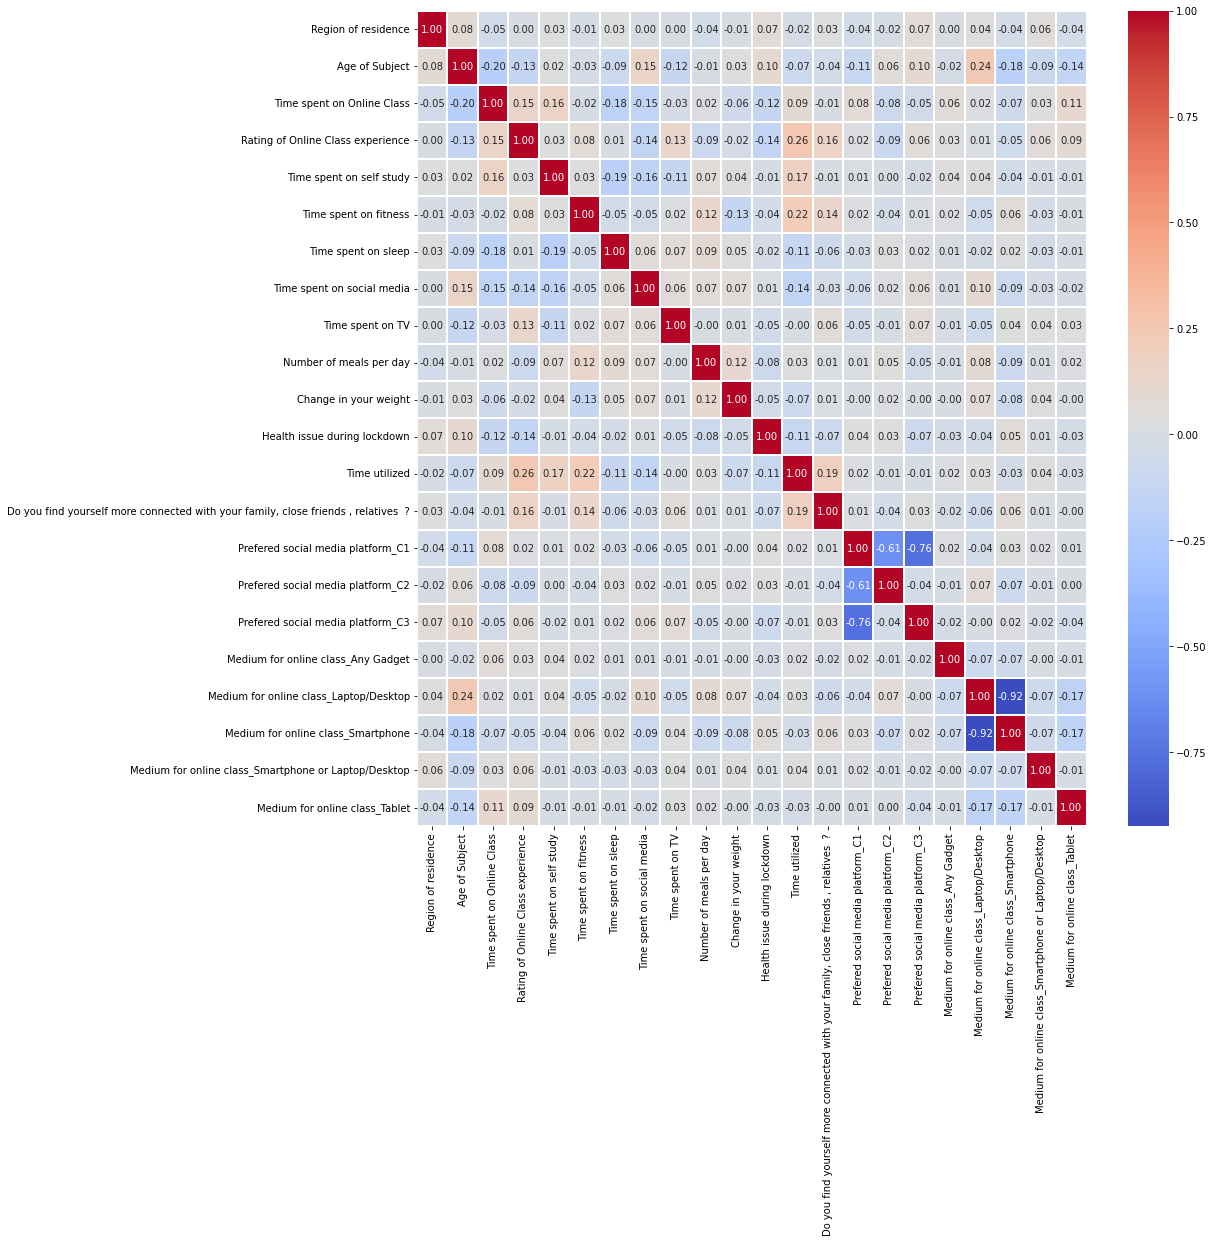

In [22]:
# Display the the heat map for showing the corr between all the data using the transformed data df
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize = (15,15))
display(sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True, fmt = '.2f', linewidths = 2))

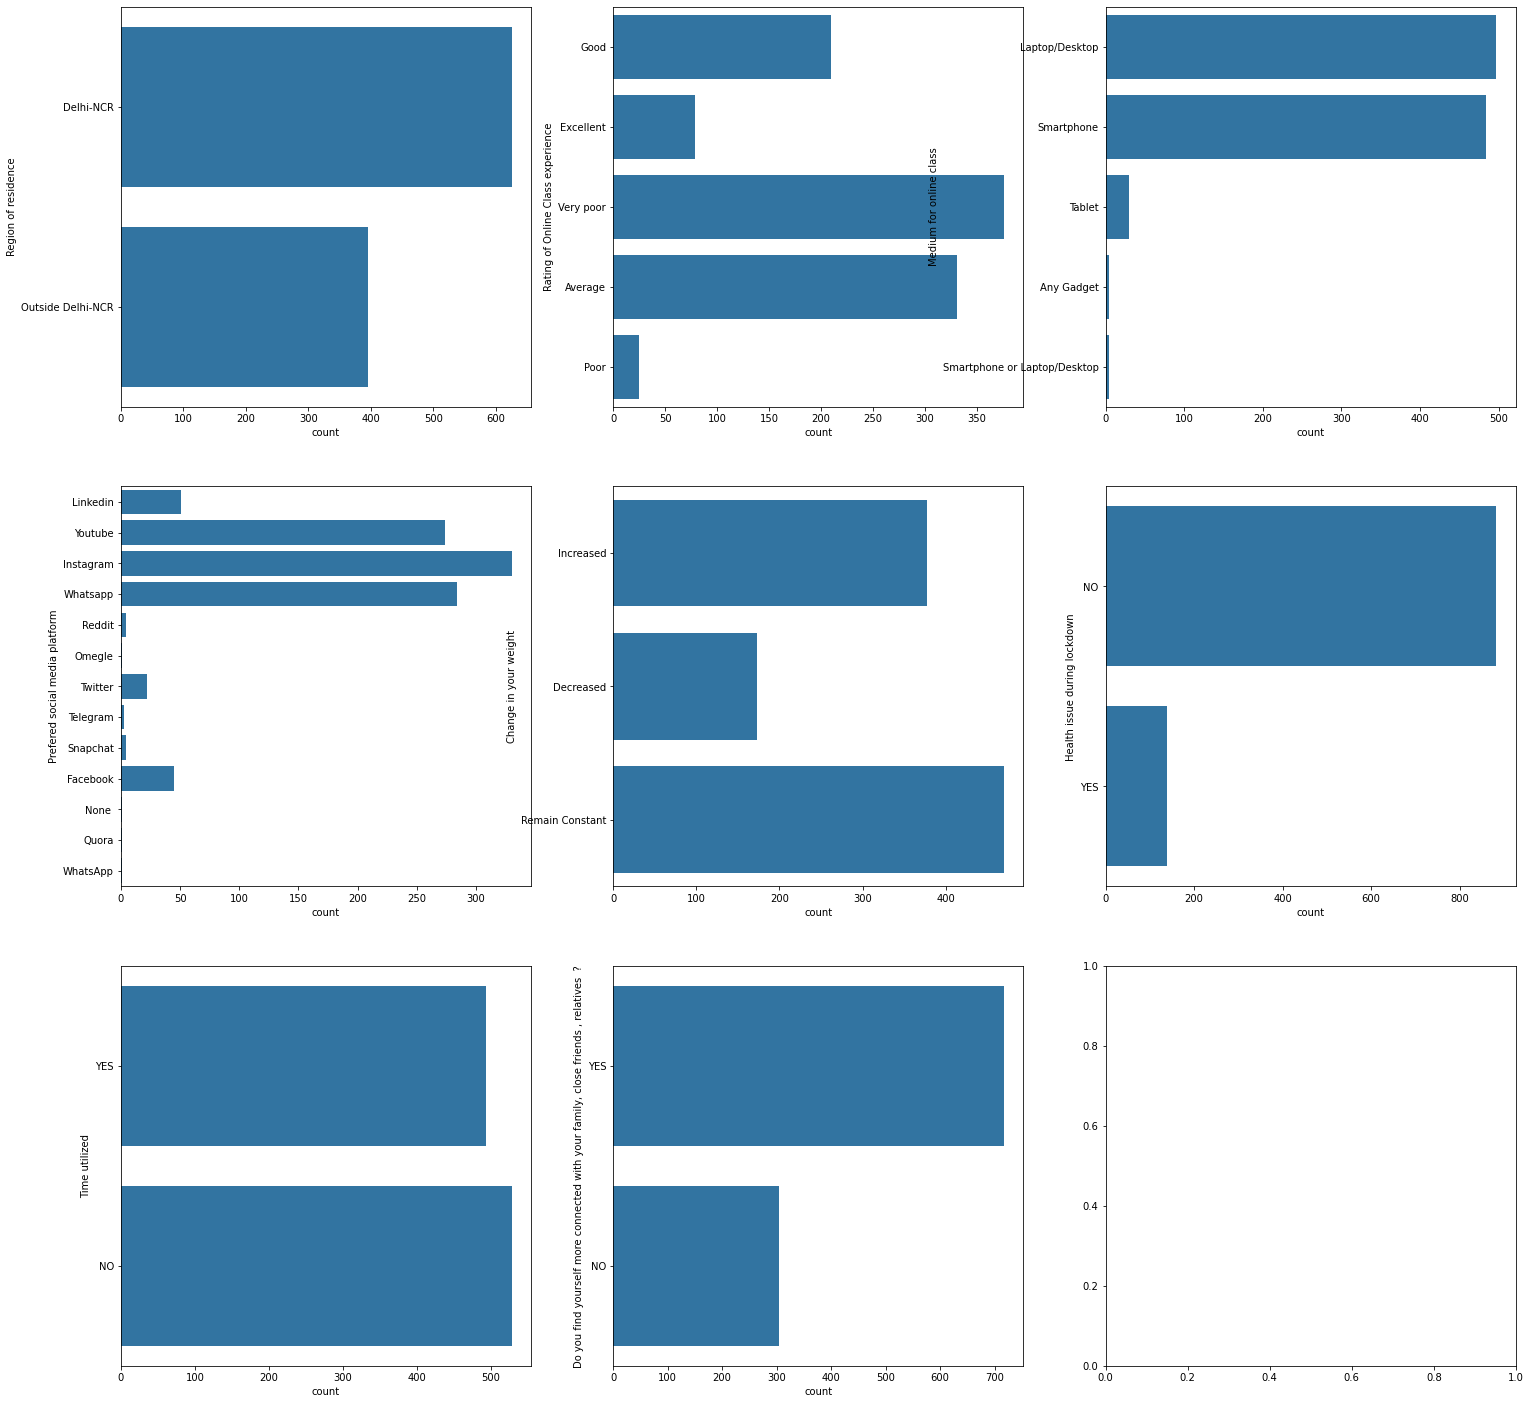

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17072\3755851985.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=80)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17072\3755851985.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=80)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17072\3755851985.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=80)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17072\3755851985.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_

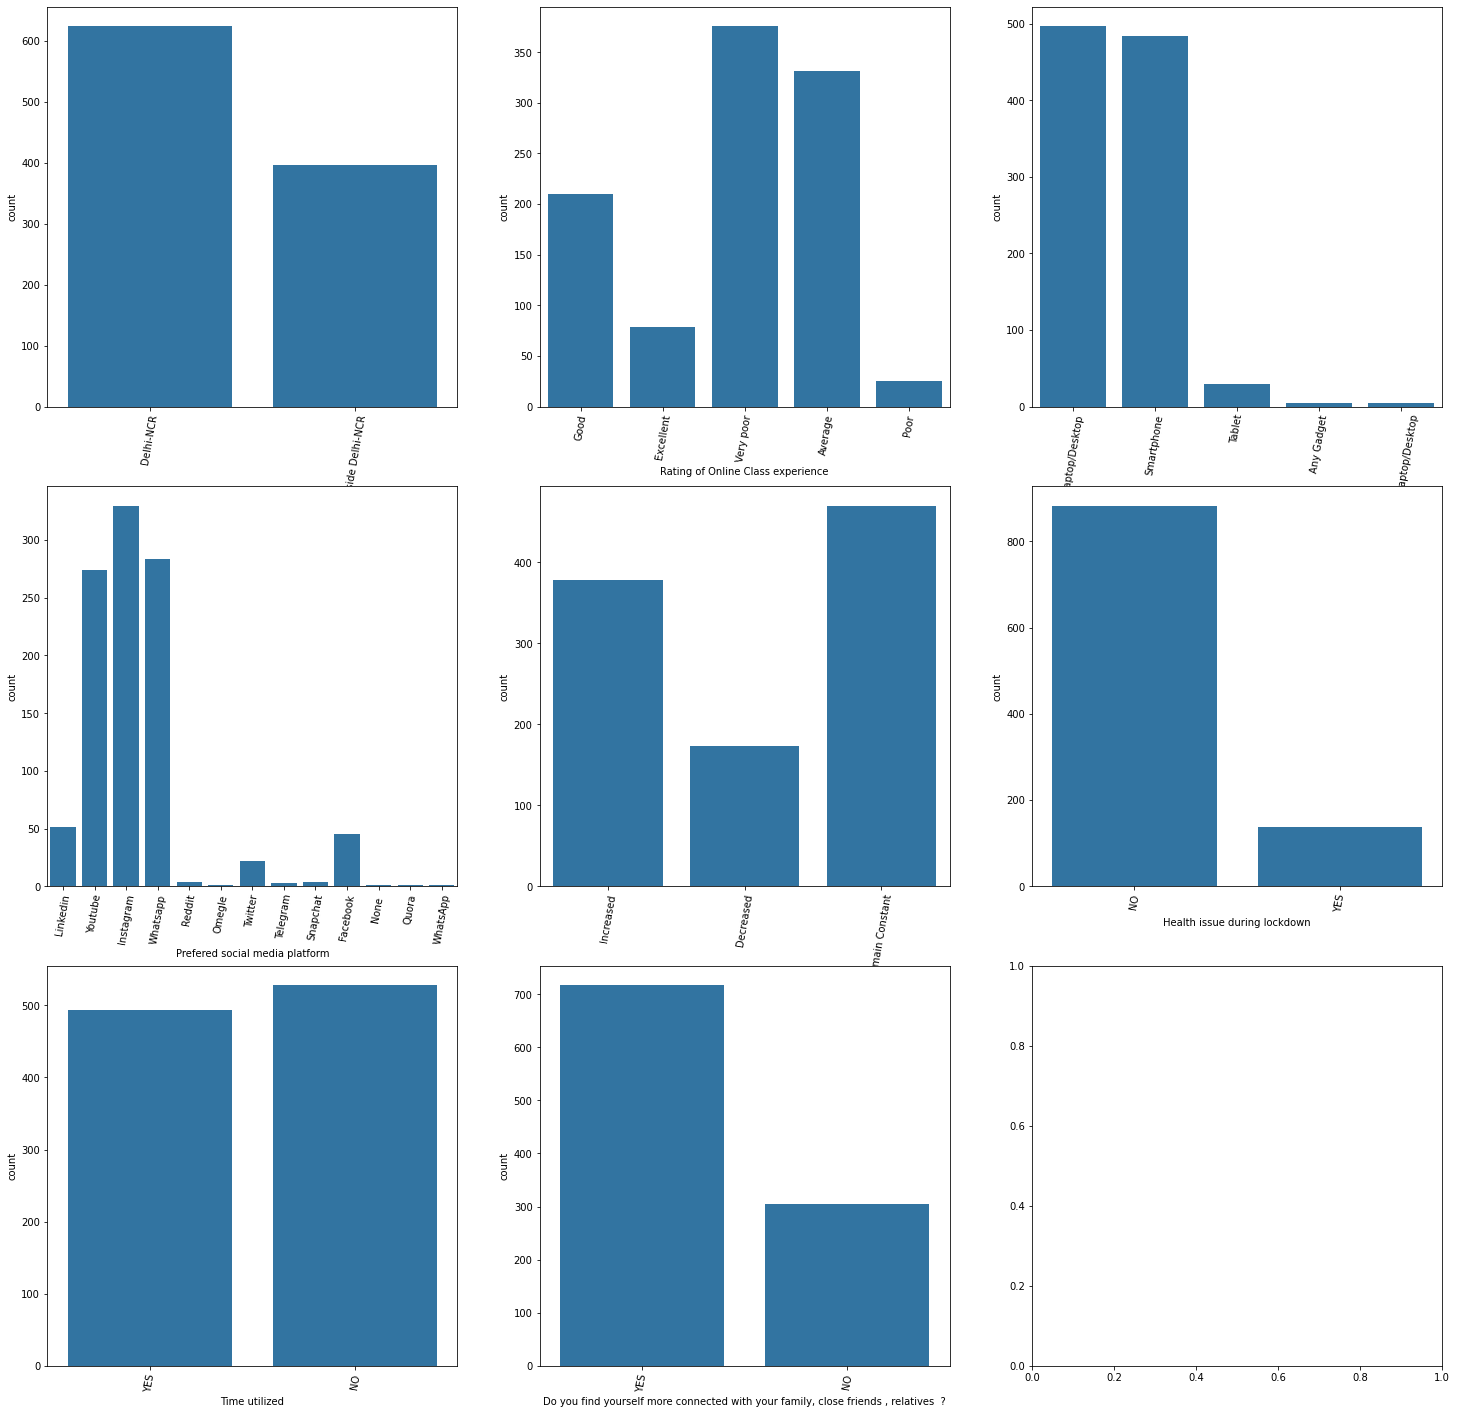

In [23]:


nCols=3   # The number of columns that you want
nRows=len(cat_columns)//nCols+1   # The number of correspomding rows 

## to avoid rotating labels:
fig,axes = plt.subplots(nRows, nCols, figsize=(25,25))
for ind,col in enumerate(cat_columns):
    sns.countplot(y=col,data=vdf,ax=axes.flatten()[ind])
plt.show()

# ## to have it on x axis:
fig,axes = plt.subplots(nRows, nCols, figsize=(25,25))
for ind,col in enumerate(cat_columns):
     axis=axes.flatten()[ind]
     sns.countplot(x=col,data=vdf,ax=axis)
     axis.set_xticklabels(axis.get_xticklabels(), rotation=80)
plt.show()

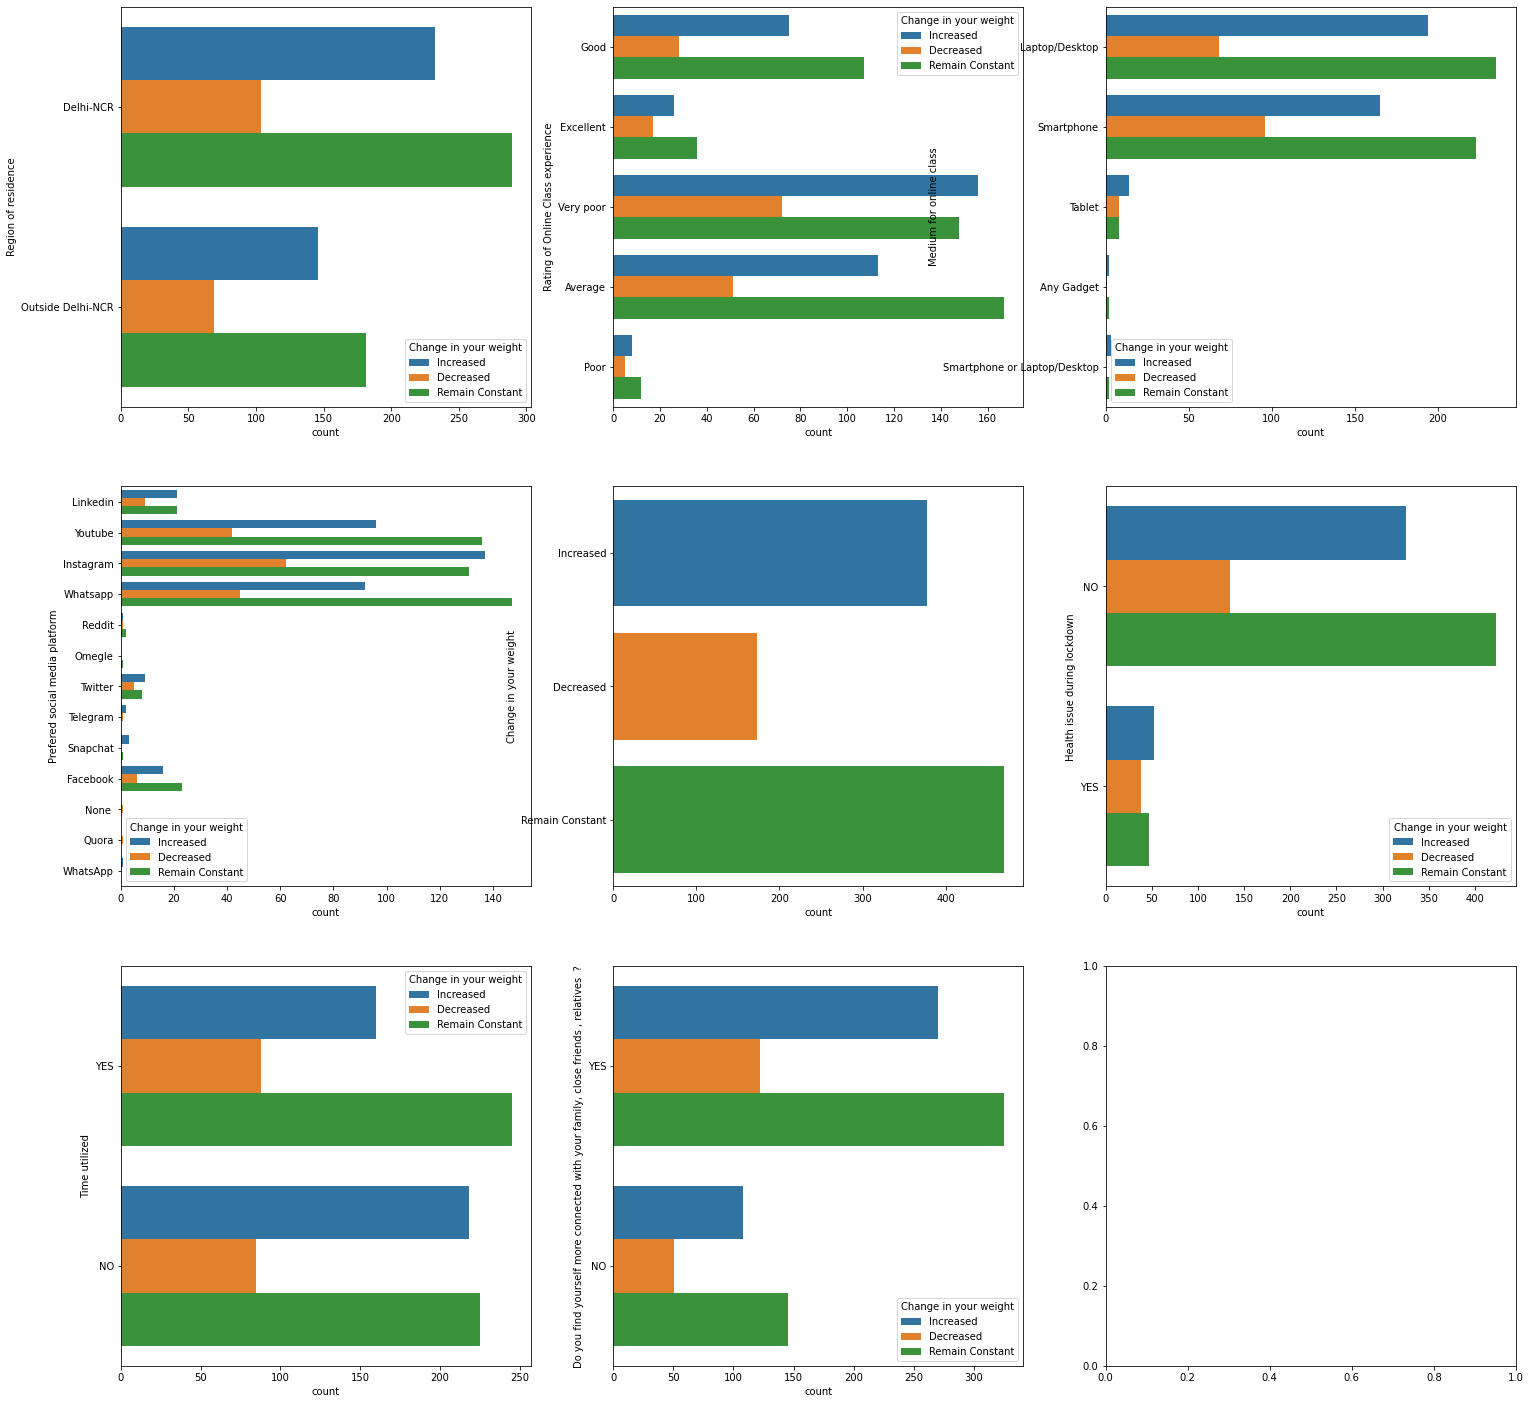

In [24]:
#Histograms for each column differentiated with *Change in your weight* column.

nCols=3   # The number of columns that you want
nRows=len(cat_columns)//nCols+1   # The number of correspomding rows 

fig,axes = plt.subplots(nRows, nCols, figsize=(25,25))
for ind,col in enumerate(cat_columns):
    sns.countplot(y=col,hue='Change in your weight',data=vdf,ax=axes.flatten()[ind])
plt.show()

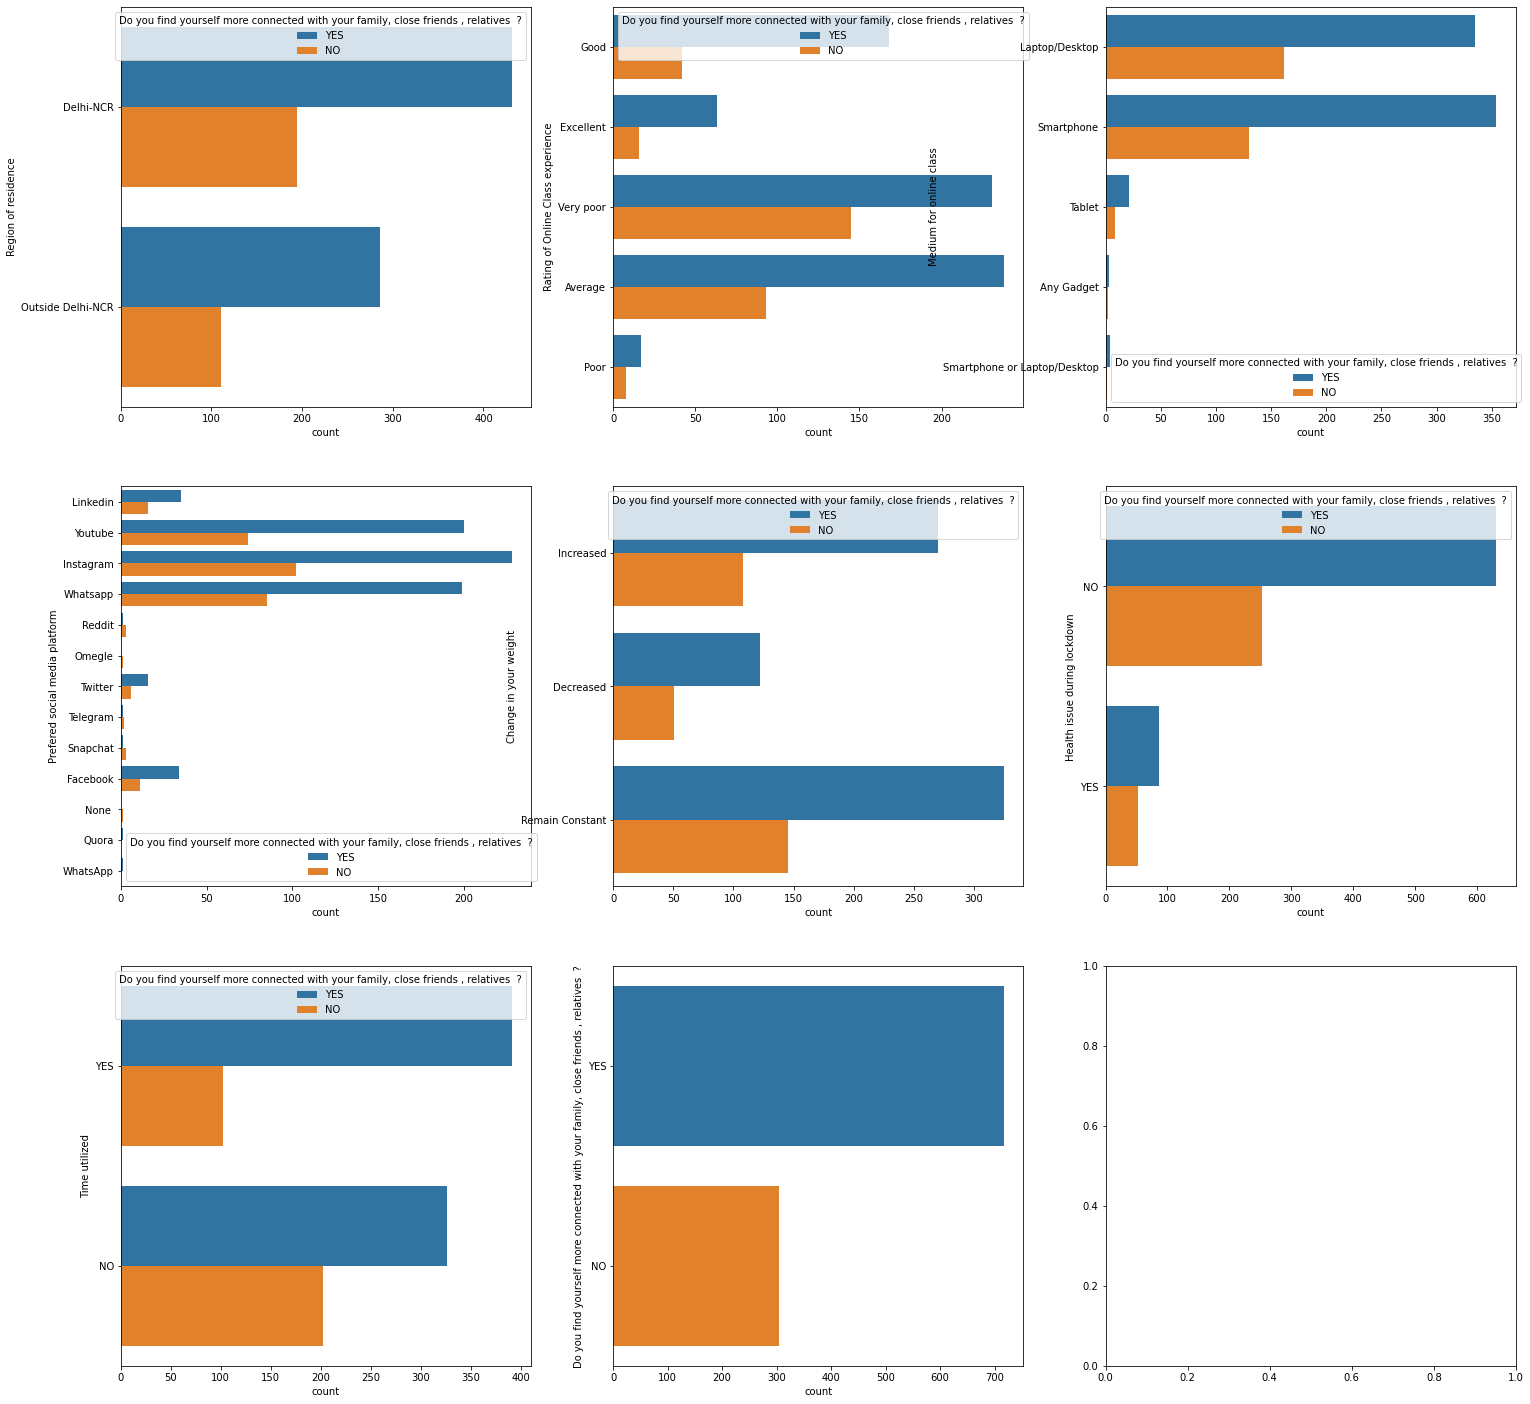

In [25]:
#Histograms for each column differentiated with *Do you find yourself more connected with your family, close friends , relatives  ?* column.

nCols=3   # The number of columns that you want
nRows=len(cat_columns)//nCols+1   # The number of correspomding rows 

fig,axes = plt.subplots(nRows, nCols, figsize=(25,25))
for ind,col in enumerate(cat_columns):
    sns.countplot(y=col,hue='Do you find yourself more connected with your family, close friends , relatives  ?',data=vdf,ax=axes.flatten()[ind])
plt.show()

<Figure size 432x288 with 0 Axes>

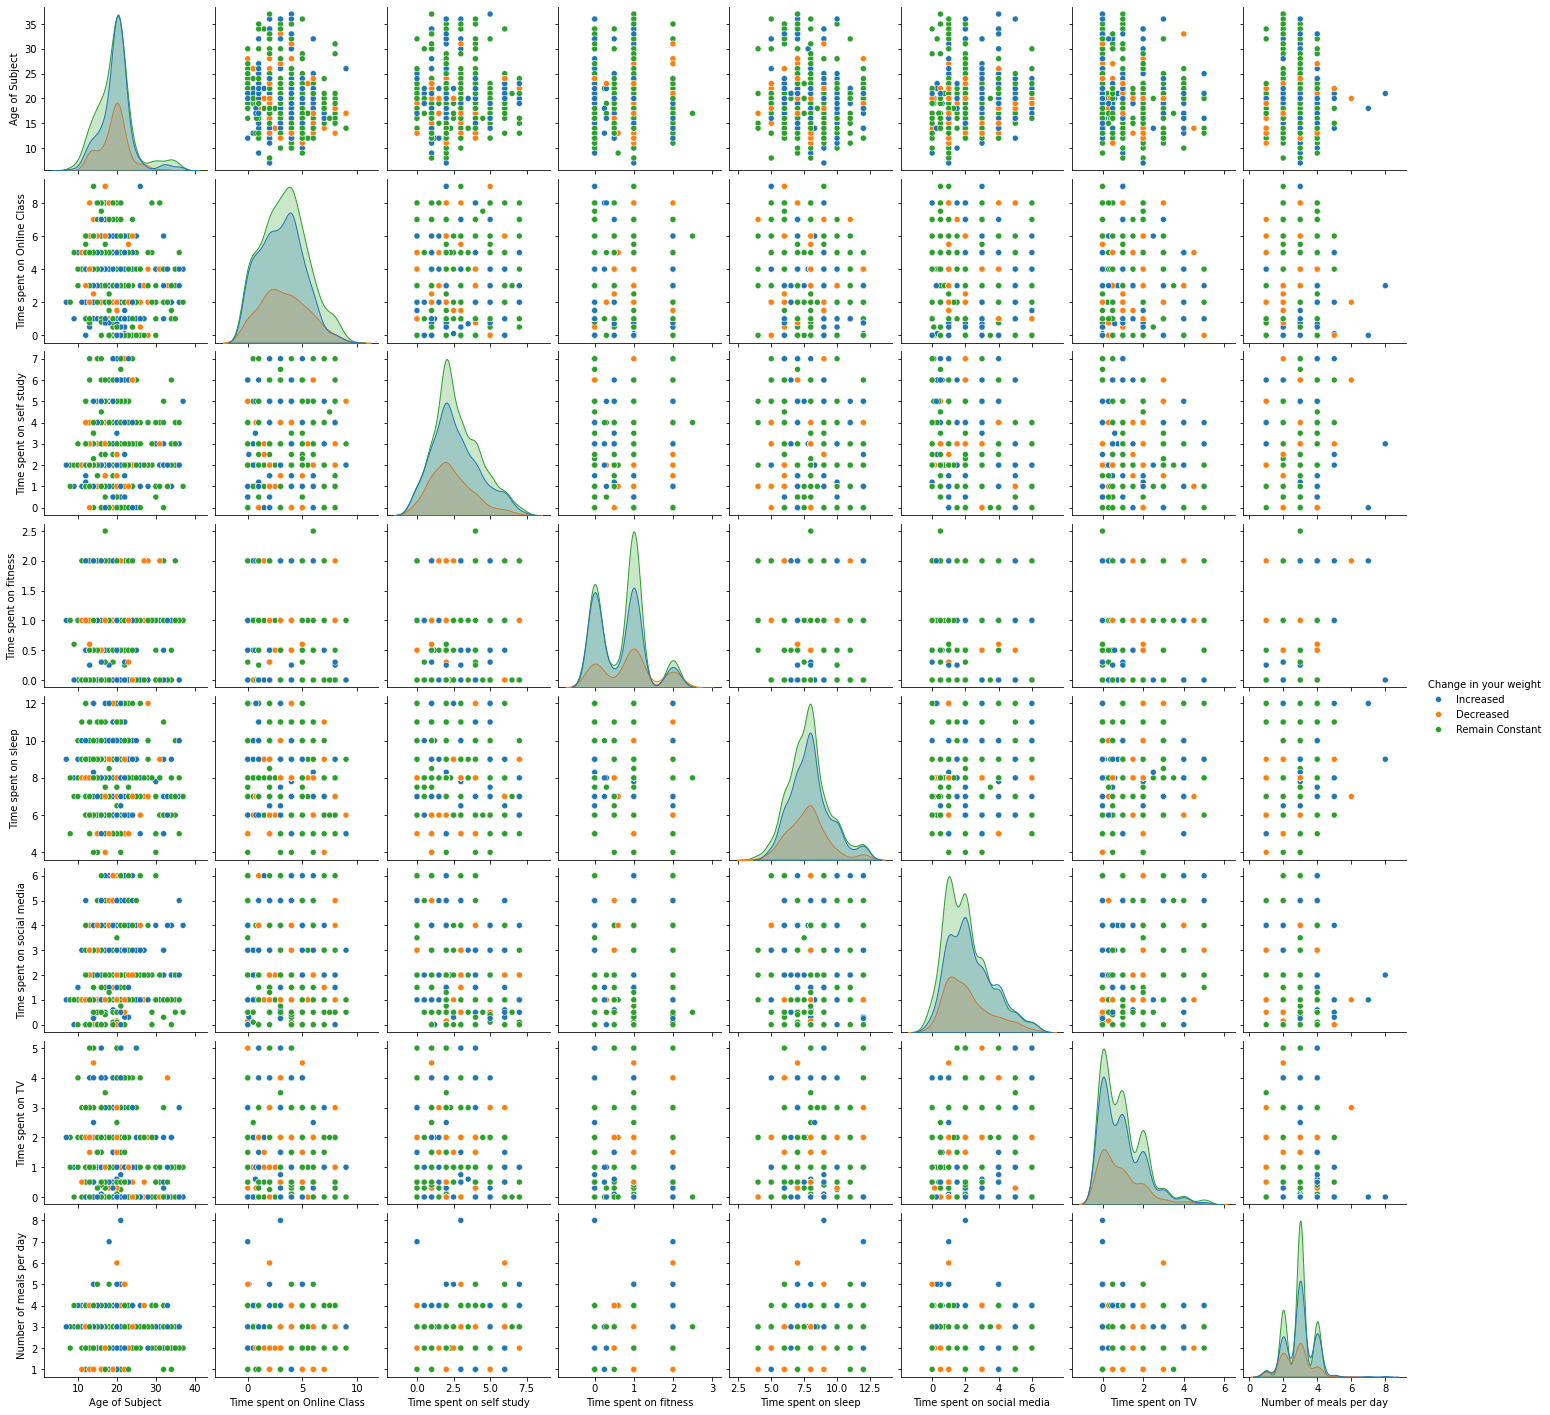

In [26]:
#show the relationship between all numric varibales differentiated with "Change in your weight"
plt.figure()
sns.pairplot(vars=num_columns,hue ='Change in your weight',data=vdf)   # look for {x, y}_vars kwargs
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17072\3450052054.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17072\3450052054.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17072\3450052054.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17072\3450052054.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xtic

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17072\3450052054.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17072\3450052054.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17072\3450052054.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17072\3450052054.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xtic

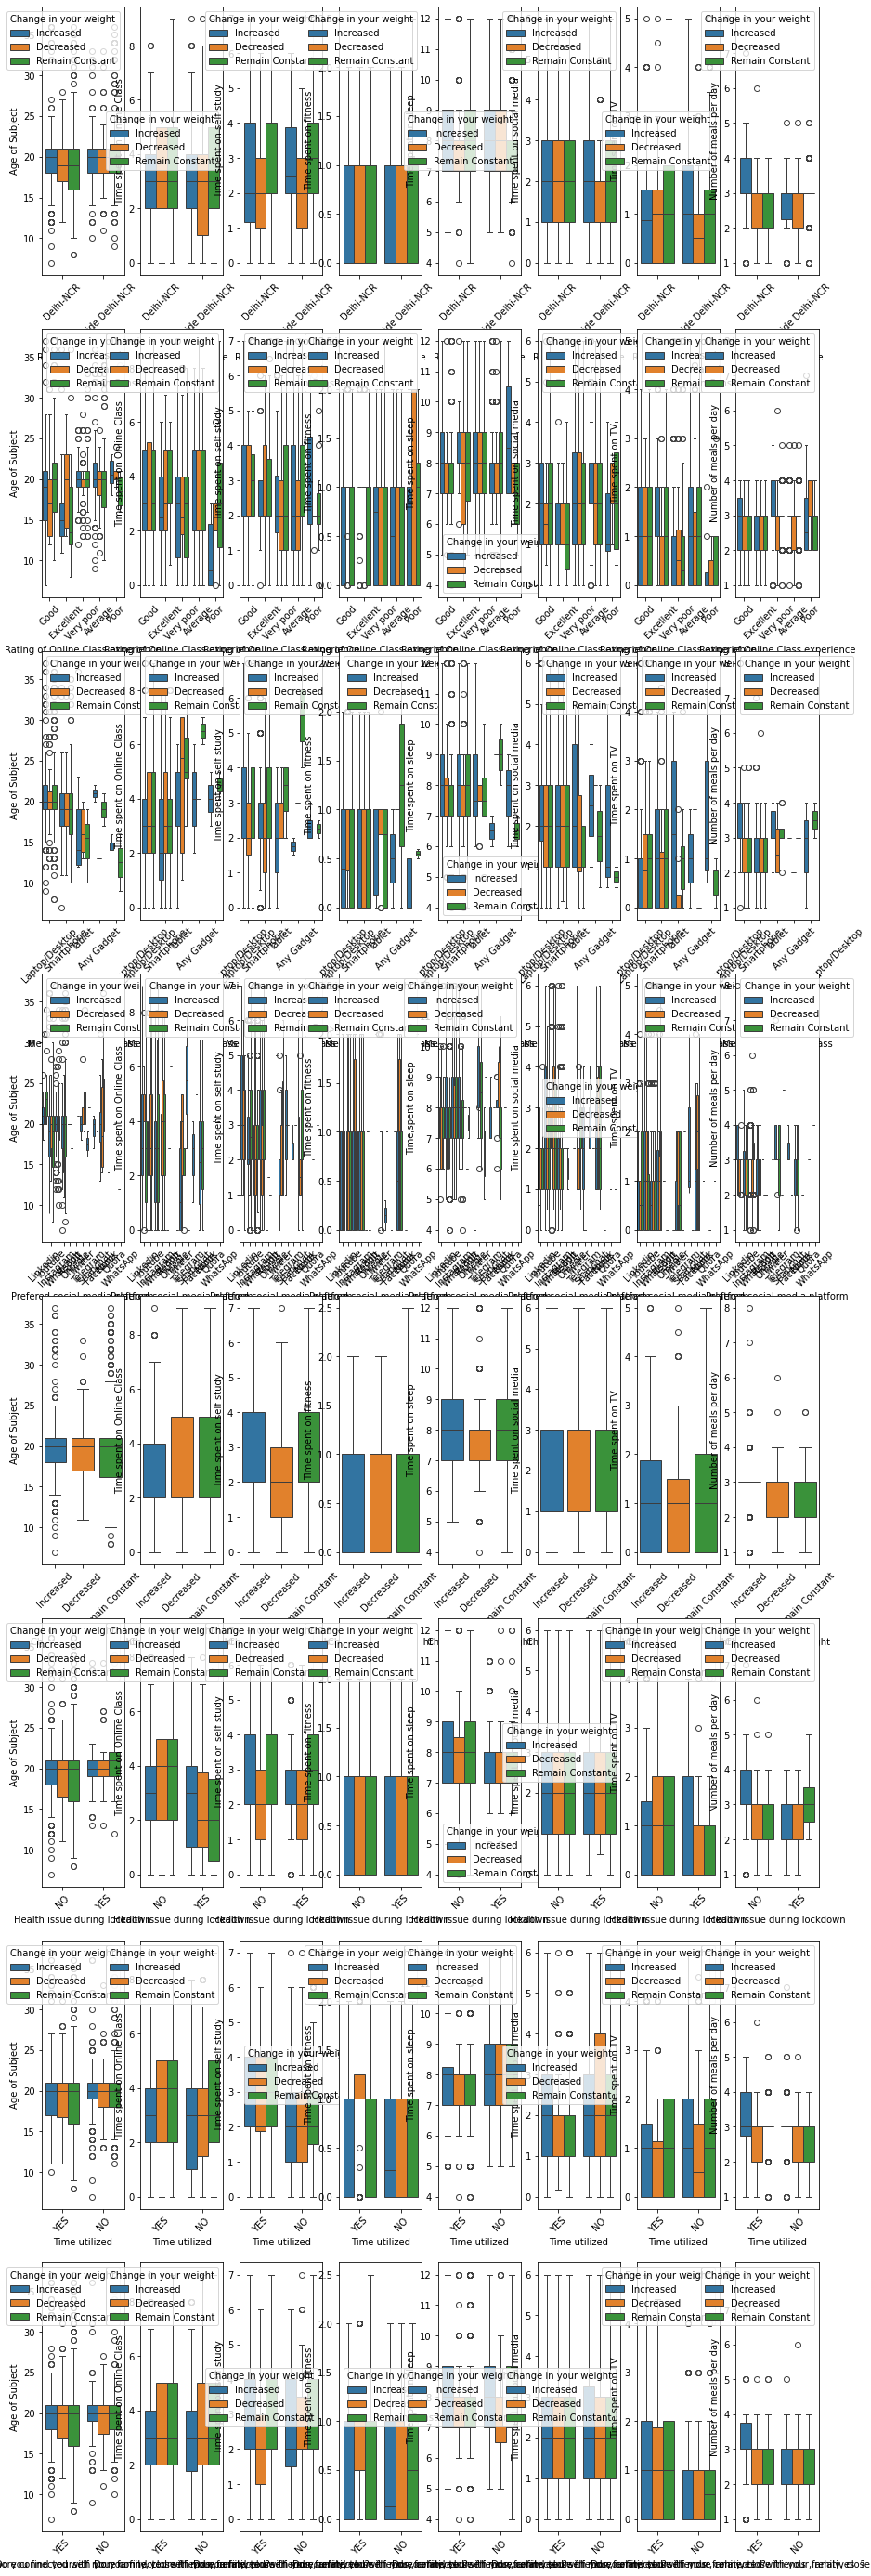

In [27]:
fig,axes = plt.subplots(len(cat_columns), len(num_columns), figsize=(15,50))
for c,nCol in enumerate(num_columns):
    for r,cCol in enumerate(cat_columns):
        axis=axes[r][c]
        sns.boxplot(x=cCol,y=nCol,hue='Change in your weight',data=vdf, ax=axis)
        axis.set_xticklabels(axis.get_xticklabels(), rotation=45)
plt.show()

# Model Building:

 

- includes **

a. Estimate the unknown model parameters (fitting) and evaluate the model (validation/cross-validation). Page 3 of 3 b. Compare different models based on the performance measures. c. Interpret the findings and provide the details of the final selected model.**

In [28]:
df

Region of residence  Age of Subject  Time spent on Online Class  \
0                       0        0.466667                   -0.606460   
1                       0        0.466667                   -1.585154   
2                       0        0.433333                    1.840276   
3                       0        0.433333                   -0.117113   
4                       0        0.466667                   -0.117113   
...                   ...             ...                         ...   
1177                    0        0.166667                   -0.117113   
1178                    0        0.233333                    1.350929   
1179                    0        0.200000                    0.372235   
1180                    0        0.233333                    0.861582   
1181                    0        0.200000                    0.861582   

      Rating of Online Class experience  Time spent on self study  \
0                                     3                  0.872098   
1                                     4                 -1.674665   
2                                     0                  0.235407   
3                                     0                 -0.401284   
4                                     3                  0.235407   
...                                 ...                       ...   
1177                                  3                  0.872098   
1178                                  2                  0.872098   
1179                                  2                 -1.674665   
1180                                  4                  0.553753   
1181                                  3                 -0.401284   

      Time spent on fitness  Time spent on sleep  Time spent on social media  \
0                 -1.134721            -0.567904                    0.607721   
1                  2.005194             1.381979                    0.607721   
2                 -1.134721            -1.217866                   -0.126014   
3                  0.435236            -1.217866                    2.075193   
4                  0.435236             0.082057                    0.607721   
...                     ...                  ...                         ...   
1177               0.435236             0.082057                   -0.859750   
1178               0.435236             0.732018                   -0.859750   
1179              -0.349742             0.082057                    0.607721   
1180               0.435236             0.082057                   -1.226618   
1181              -0.349742            -0.567904                   -0.859750   

      Time spent on TV  Number of meals per day  ...  Time utilized  \
0             0.042717                        4  ...              1   
1            -0.893210                        3  ...              1   
2            -0.893210                        3  ...              0   
3            -0.893210                        3  ...              0   
4             0.042717                        4  ...              0   
...                ...                      ...  ...            ...   
1177          0.978645                        3  ...              1   
1178          0.042717                        4  ...              1   
1179          0.978645                        4  ...              0   
1180          0.042717                        4  ...              1   
1181          0.042717                        3  ...              1   

      Do you find yourself more connected with your family, close friends , relatives  ?  \
0                                                     1                                    
1                                                     0                                    
2                                                     1                                    
3                                                     0                                    
4                         

In [29]:
# Generate Train - Test splits to reduce the level overfitting
from sklearn.model_selection import train_test_split

#corr_ = abs(df.corr()["Change in your weight"])
#df_ = df[corr_[corr_>0.06].index]

#the above method is used when we want to use only the feature that has better corr with the target
#however it will be a bit bias

X = df.drop('Change in your weight',axis=1).values
y = df['Change in your weight'].values 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)


In [30]:
# Build a decision tree by using library of sklearn
from sklearn import tree
dtClf = tree.DecisionTreeClassifier(criterion='entropy',splitter='best',random_state=42)
dtClf = dtClf.fit(X_train,y_train)
dt_y_pred = dtClf.predict(X_test)

# Show the accuracy of the data by classification metrics
from sklearn.metrics import accuracy_score, confusion_matrix
print("Decision Tree: \n")
print("Accuracy:=",  accuracy_score(y_test, dt_y_pred))
print("Confusion Matrix:= \n", confusion_matrix(y_test, dt_y_pred))


Decision Tree: 

Accuracy:= 0.3941368078175896
Confusion Matrix:= 
 [[12 22 20]
 [30 68 50]
 [19 45 41]]


In [31]:
# Show the accuracy of the data by classification metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

           0       0.20      0.22      0.21        54
           1       0.50      0.46      0.48       148
           2       0.37      0.39      0.38       105

    accuracy                           0.39       307
   macro avg       0.36      0.36      0.36       307
weighted avg       0.40      0.39      0.40       307



In [32]:
# Show the plot of Decision tree
import matplotlib.pyplot as plt
plt.figure(figsize =(10,10),dpi=1000)
tree.plot_tree(dtClf,feature_names=df.columns[:-1].tolist(),class_names=['0','1','2'],
               filled=True,rounded=True,max_depth=2); 
#the max depth is reduced in order to make the tree more visable due to the large data
plt.show()

In [33]:
# Random forest benefit than decision tree in overfitting data
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10,criterion='entropy', random_state=42)
rf = rf.fit(X_train,y_train)
rf_y_prd=rf.predict(X_test)

display(rf_y_prd)
np.unique(y_test, return_counts=True)

# Show the accuracy of the data by classification metrics
from sklearn.metrics import accuracy_score, confusion_matrix
print("Random forest: \n")
print("Accuracy:=",  accuracy_score(y_test, rf_y_prd))
print("Confusion Matrix:= \n", confusion_matrix(y_test, rf_y_prd))

array([1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       2, 0, 0, 1, 1, 2, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 2, 0, 2, 2, 1,
       1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2,
       1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0,
       1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2,
       2, 0, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2,
       1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1,
       1, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       0, 0, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2,
       1, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1, 2, 2, 1, 1,

Random forest: 

Accuracy:= 0.43322475570032576
Confusion Matrix:= 
 [[ 5 29 20]
 [ 6 89 53]
 [11 55 39]]


In [34]:
#Random forest plot
fig, axes = plt.subplots(nrows = 5,ncols = 2,figsize = (10,10), dpi=1000)
for index,axis in enumerate(axes.flatten()):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = df.columns[0:-1], 
                   class_names=['0','1','2'],
                   filled = True,
                   max_depth=1,
                   ax = axis);

    axis.set_title('Estimator: ' + str(index+1), fontsize = 11)
#the max depth is reduced in order to make the tree more visable due to the large data

In [35]:
#using naive_bayes 
from sklearn.naive_bayes import GaussianNB
NBClf2 = GaussianNB()   
NBClf2.fit(X_train,y_train)
NB_y_pred = NBClf2.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix
print("NB for Numerical  Data: \n")
print("Accuracy:=",  accuracy_score(y_test, NB_y_pred))
print("Confusion Matrix:= \n", confusion_matrix(y_test, NB_y_pred) )

NB for Numerical  Data: 

Accuracy:= 0.18241042345276873
Confusion Matrix:= 
 [[ 53   0   1]
 [145   0   3]
 [102   0   3]]


In [36]:
print("Accuracy of Decision Tree:=",  accuracy_score(y_test, dt_y_pred))
print("Accuracy Random forest:=",  accuracy_score(y_test, rf_y_prd))
print("Accuracy of NB:=",  accuracy_score(y_test, NB_y_pred))

Accuracy of Decision Tree:= 0.3941368078175896
Accuracy Random forest:= 0.43322475570032576
Accuracy of NB:= 0.18241042345276873


In [37]:
#we can see that the Random forest method is the best in this data
#although it's Accuracy is still considerd low we conclode that this
#data set have weak relations thus the target can't be predicted correctly

# Operatiaonalize

1.--> Determine the objectives, problem and outcomes you are interested in.

2.--> Select dataset about your problem.

3.--> Clean data from outliers, and missing values by using methods like hot encoding, normalization, standardization, etc.

4.--> Prepare data to make it ready for classification by using classification algorithms based on your data like decision tree, logistic regression, and random forest.

5.--> Train the model to determine the strength of relationships between input variables and output variables.

6.--> Evaluate the model by using metrices like accuracy and precision.

Problems and issues:

Overfitting: it occurs when the model is too complex. This may lead to poor performance in new data.

Underfitting: it is the opposite of the previous one, it occurs when the model is too simple, also it may lead to poor performance.


# Communicate results:


The dataset used for this analysis was obtained from Kaggle. The dataset initially presented challenges, including missing records and outliers. These issues were effectively addressed through careful data preprocessing, where missing values were handled, and outlier detection and treatment were performed.

Data visualizations were employed to gain insights into the underlying patterns and relationships within the dataset. These visualizations provided valuable context for the subsequent model-building process.

Three machine learning models, Naive Bayes, Decision Trees, and Random Forest—were tuned and trained on the preprocessed data. The models were evaluated using confusion matrices and accuracy scores.


We saw the highest accurecy value is 46.9% with random forest method, this shows the relationship between variables is weak